In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### 欧式距离

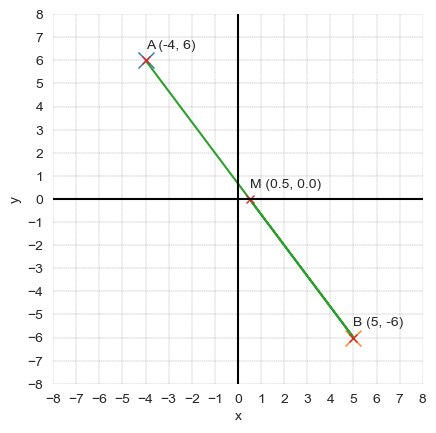

In [8]:
x_A = -4
y_A = 6

x_B = 5
y_B = -6

x_M = (x_A + x_B)/2
y_M = (y_A + y_B)/2

fig, ax = plt.subplots()

# 绘制 A 和 B
plt.plot(x_A, y_A, 'x', markersize = 12)
plt.plot(x_B, y_B, 'x', markersize = 12)

# 创建包含点 A，B，M 的坐标列表
x_points = [x_A,x_B,x_M]
y_points = [y_A,y_B,y_M]

# 绘制连线
plt.plot(x_points,y_points)
plt.plot(x_points,y_points)

labels = ['A', 'B', 'M']

# 绘制 A, B 和 M
plt.plot(x_points, y_points, 'x')

for label, i, j in zip(labels, x_points, y_points):
   plt.text(i, j+0.5, label + ' ({}, {})'.format(i, j))

plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.xticks(np.arange(-8, 8 + 1, step=1))
plt.yticks(np.arange(-8, 8 + 1, step=1))
plt.axis('scaled')

ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])

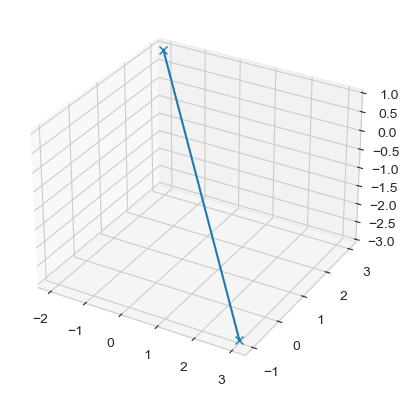

<Figure size 640x480 with 0 Axes>

In [19]:
# point A
x_A = -2
y_A = 3
z_A = 1

# point B
x_B = 3
y_B = -1
z_B = -3

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot([x_A, x_B],[y_A, y_B],[z_A, z_B],'x', linestyle = '-')

plt.show()
ax.set_proj_type('ortho')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(-4,4)

plt.tight_layout()
ax.set_xlabel('$\it{x}$')
ax.set_ylabel('$\it{y}$')
ax.set_zlabel('$\it{z}$')

ax.view_init(azim=-135, elev=30)
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})

#### 成对距离

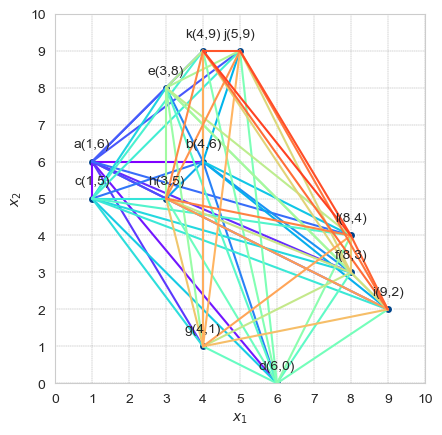

In [20]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns
from matplotlib import cm

# define sample data
X = np.array([[1, 6], [4, 6], [1, 5], [6, 0],
              [3, 8], [8, 3], [4, 1], [3, 5],
              [9, 2], [5, 9], [4, 9], [8, 4]])

# define labels
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

# 生成彩虹色
colors = plt.cm.rainbow(np.linspace(0, 1, int(len(X) * len(X) / 2)))

fig, ax = plt.subplots()

# 生成 X 中两两组合的数据点
for i, d in enumerate(itertools.combinations(X, 2)):
   plt.plot([d[0][0], d[1][0]], [d[0][1], d[1][1]], color=colors[i, :])

# plot scatter of sample data
plt.scatter(x=X[:, 0], y=X[:, 1], color=np.array([0, 68, 138]) / 255., alpha=1.0,
            linewidth=1, edgecolor=[1, 1, 1])

for i, (x, y) in enumerate(zip(X[:, 0], X[:, 1])):
   # add labels to the sample data
   label = labels[i] + f"({x},{y})"
    
   # 在图中某一点添加注释
   plt.annotate(label,  # text
                (x, y),  # point to label
                textcoords="offset points",
                xytext=(0, 10),
                # distance from text to points (x,y)
                # 水平对齐
                ha='center')
   # horizontal alignment center

ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_aspect('equal')
plt.show()


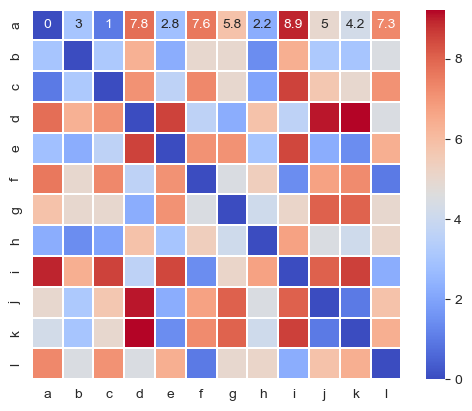

In [22]:
from sklearn.metrics.pairwise import euclidean_distances

Pairwise_d = euclidean_distances(X)

fig, ax = plt.subplots()

h = sns.heatmap(Pairwise_d, cmap="coolwarm",
                square=True, linewidths=.05, annot=True,
                xticklabels=labels, yticklabels=labels)

#### 点到直线距离

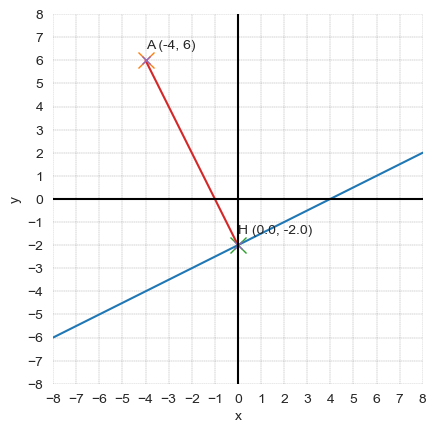

In [26]:
def dist(a, b, c, x_A, y_A):
    
    # 计算点到直线的距离
    dist_AH = np.abs(a*x_A + b*y_A + c)/np.sqrt(a**2 + b**2)
    
    # 直线上距离点最近的坐标
    x_H = (b*(b*x_A - a*y_A) - a*c)/(a**2 + b**2)
    y_H = (a*(-b*x_A + a*y_A) - b*c)/(a**2 + b**2)
    return x_H, y_H, dist_AH

x_A = -4
y_A = 6

a = 1
b = -2
c = -4

x_array = np.linspace(-8,8,10)
y_array = -a/b*x_array - c/b

x_H, y_H, dist_AH = dist(a, b, c, x_A, y_A)

fig, ax = plt.subplots()

# 绘制直线
plt.plot(x_array, y_array)

# 绘制直线外一点
plt.plot(x_A,y_A, 'x', markersize = 12)
# 绘制直线上距离直线外最近的一点
plt.plot(x_H,y_H, 'x', markersize = 12)

x_points = [x_A,x_H]
y_points = [y_A,y_H]

# 绘制直线
plt.plot(x_points,y_points)

labels = ['A', 'H']

# 标记两个点
plt.plot(x_points, y_points, 'x')

for label, i, j in zip(labels, x_points, y_points):
   plt.text(i, j+0.5, label + ' ({}, {})'.format(i, j))

plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.xticks(np.arange(-8, 8 + 1, step=1))
plt.yticks(np.arange(-8, 8 + 1, step=1))
plt.axis('scaled')

ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])

#### 等距线

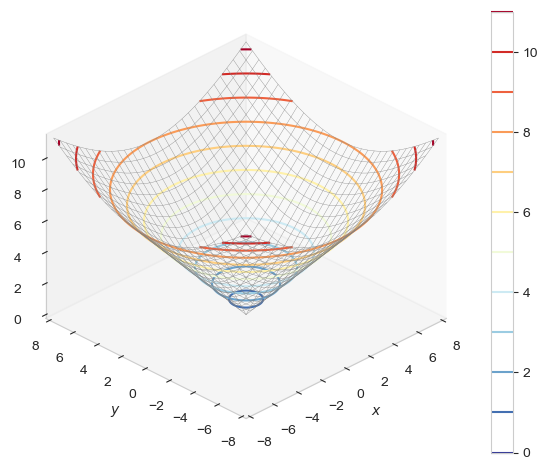

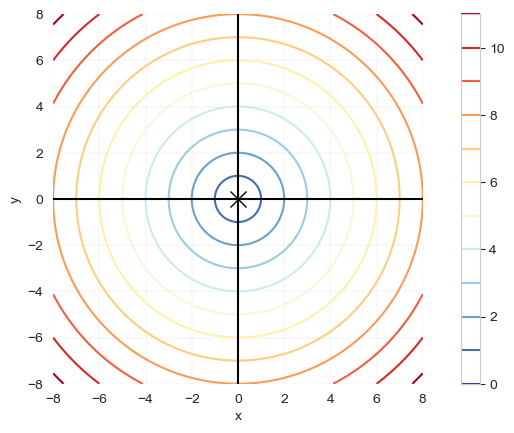

In [28]:
import numpy as np
from sympy import lambdify, sqrt
from sympy.abc import x, y
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm

# 原点
O = [0, 0]

num = 301;  # number of mesh grids
x_array = np.linspace(-8, 8, num)
y_array = np.linspace(-8, 8, num)

xx, yy = np.meshgrid(x_array, y_array)

# 距离原点的欧式距离
dist_OP = sqrt((x - O[0]) ** 2 + (y - O[1]) ** 2)
# 将符号表达式转换为函数
dist_OP_fcn = lambdify([x, y], dist_OP)

dist_OP_zz = dist_OP_fcn(xx, yy)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# 绘制线框图
ax.plot_wireframe(xx, yy, dist_OP_zz,
                  color=[0.5, 0.5, 0.5],
                  rstride=10, cstride=10,
                  linewidth=0.25)

# 绘制等距线
colorbar = ax.contour(xx, yy, dist_OP_zz,
                      levels=np.arange(0, 11 + 1),
                      cmap='RdYlBu_r')

# 添加颜色
fig.colorbar(colorbar, ax=ax)

ax.set_proj_type('ortho')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')
plt.tight_layout()
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.view_init(azim=-135, elev=30)

ax.grid(False)
plt.show()

fig, ax = plt.subplots()

plt.plot(O[0], O[1], color='k',
         marker='x', markersize=12)

# 绘制等距线
colorbar = ax.contour(xx, yy, dist_OP_zz,
                      levels=np.arange(0, 11 + 1),
                      cmap='RdYlBu_r')

# 添加颜色
fig.colorbar(colorbar, ax=ax)

plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.xticks(np.arange(-10, 10, step=2))
plt.yticks(np.arange(-10, 10, step=2))
plt.axis('scaled')

ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(y_array.min(), y_array.max())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(linestyle='--', linewidth=0.25, color=[0.8, 0.8, 0.8])

#### 距离间的量化关系

In [33]:
import numpy as np
from sympy import lambdify, sqrt
from sympy.abc import x, y
import numpy as np
from matplotlib import pyplot as plt 

def plot_fcn(A,B,dist_AX_zz,dist_BX_zz,distance):

    fig, ax = plt.subplots()
    
    # 标记 A 点
    plt.plot(A[0],A[1], color = 'k', marker = 'x', markersize = 12)

    colorbar = ax.contour(xx,yy, dist_AX_zz, 
                          levels = np.arange(0,15 + 1), 
                          cmap='RdYlBu_r')
    
    # 标记 B 点
    plt.plot(B[0],B[1], color = 'k', marker = 'x', markersize = 12)

    colorbar = ax.contour(xx,yy, dist_BX_zz, 
                          levels = np.arange(0,15 + 1), 
                          cmap='RdYlBu_r')
    
    ax.contour(xx,yy, distance, 
                levels = 0, 
                colors = 'k')
    
    fig.colorbar(colorbar, ax=ax)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.axvline(x=0, color='k', linestyle='-')
    plt.xticks(np.arange(-10, 10, step=2))
    plt.yticks(np.arange(-10, 10, step=2))
    plt.axis('scaled')
    
    ax.set_xlim(x_array.min(),x_array.max())
    ax.set_ylim(y_array.min(),y_array.max())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.grid(linestyle='--', linewidth=0.25, color=[0.8,0.8,0.8])


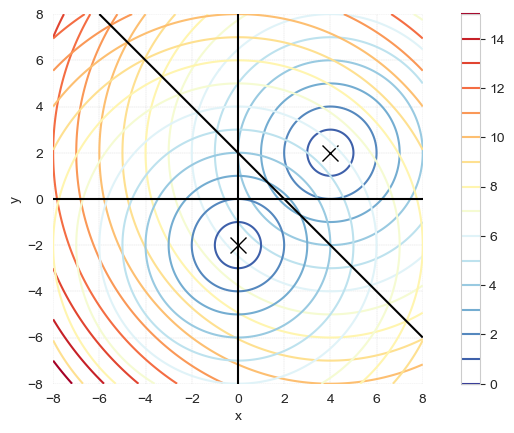

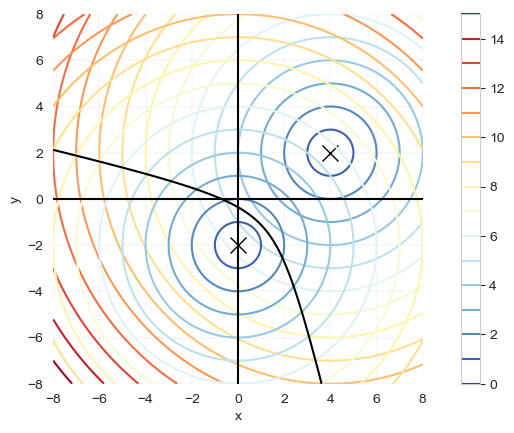

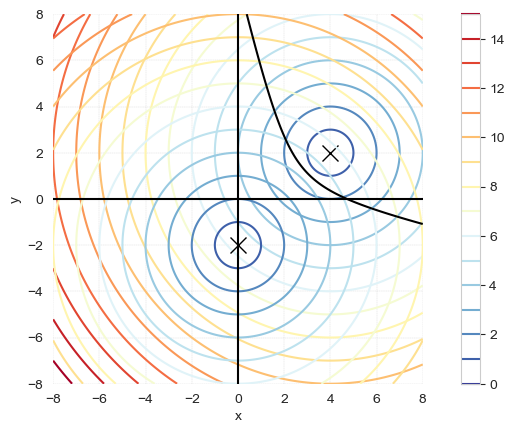

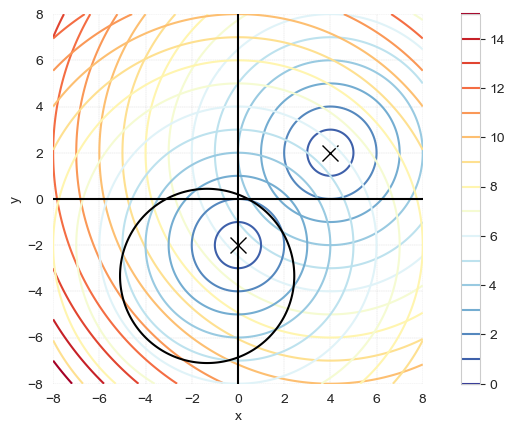

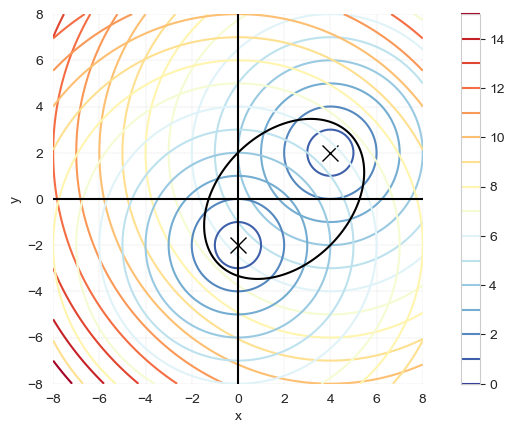

In [34]:
A = [4, 2]
B = [0, -2]

num = 301; 

# number of mesh grids
x_array = np.linspace(-8,8,num)
y_array = np.linspace(-8,8,num)

xx,yy = np.meshgrid(x_array,y_array)

# 到 A, B 两点的距离
dist_AX = sqrt((x - A[0])**2 + (y - A[1])**2)
dist_BX = sqrt((x - B[0])**2 + (y - B[1])**2)
# 将符号表达式转换为函数
dist_AX_fcn = lambdify([x,y],dist_AX)
dist_BX_fcn = lambdify([x,y],dist_BX)
# 计算距离
dist_AX_zz = dist_AX_fcn(xx,yy)
dist_BX_zz = dist_BX_fcn(xx,yy)

# AX - BX = 0
distance = dist_AX_zz - dist_BX_zz
plot_fcn(A,B,dist_AX_zz,dist_BX_zz,distance)

# AX - BX - 3 = 0
distance = dist_AX_zz - dist_BX_zz - 3
plot_fcn(A,B,dist_AX_zz,dist_BX_zz,distance)

# AX - BX + 3 = 0
distance = dist_AX_zz - dist_BX_zz + 3
plot_fcn(A,B,dist_AX_zz,dist_BX_zz,distance)


# AX - 2*BX = 0
distance = dist_AX_zz - 2*dist_BX_zz
plot_fcn(A,B,dist_AX_zz,dist_BX_zz,distance)

# BX + AX - 8 = 0
distance = dist_BX_zz + dist_AX_zz - 8
plot_fcn(A,B,dist_AX_zz,dist_BX_zz,distance)